In [97]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline  

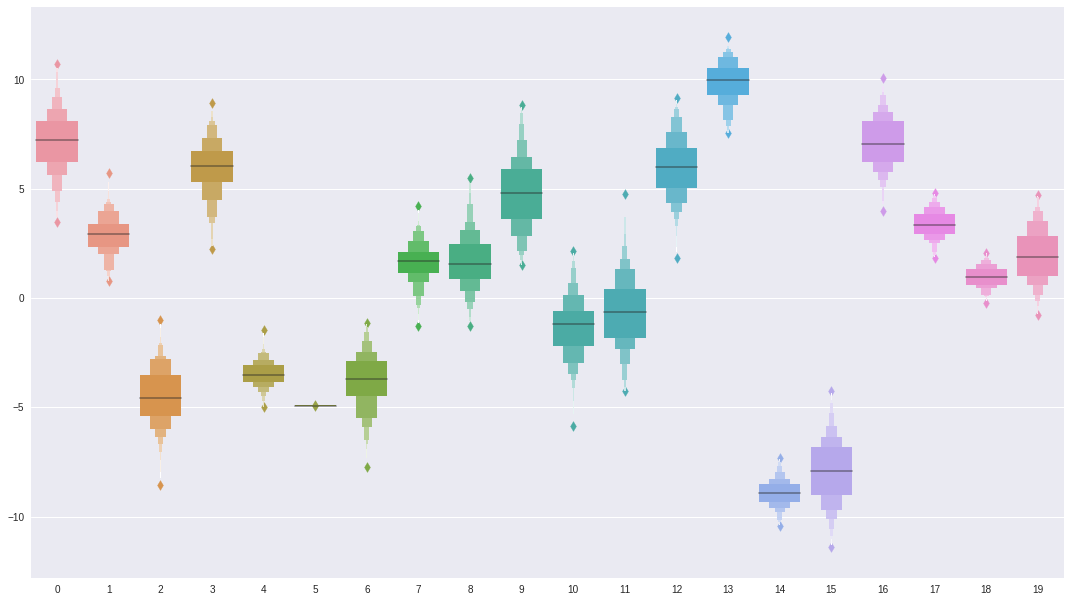

In [115]:
N_bandits = 20
reward_min = -10
reward_max = 10
reward_dispersion_min = 0
reward_dispersion_max = 2

Params = []
for i in range (0,N_bandits):
    mu = np.random.uniform(reward_min,reward_max,1)
    sigma = np.random.uniform(reward_dispersion_min,reward_dispersion_max,1)
    Params.append((mu,sigma))
    
    
def GetBanditResult(i, n=1):
    return np.random.normal(Params[i][0],Params[i][1],n)
    
    
N=100

d = [GetBanditResult(i,N) for i in range (0,N_bandits)]


fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
# Show each distribution with both violins and points
sns.lvplot(data=d)


In [101]:
Params

[(array([-5.08237267]), array([ 0.29277705])),
 (array([ 2.92285225]), array([ 0.40117437])),
 (array([-8.19861473]), array([ 0.94185994])),
 (array([ 7.72225906]), array([ 0.92338862])),
 (array([-5.55295269]), array([ 0.37034219])),
 (array([ 8.34261362]), array([ 0.86130292])),
 (array([ 6.80276394]), array([ 0.86421017])),
 (array([-8.65149926]), array([ 0.7759536])),
 (array([ 0.30425417]), array([ 0.40039754])),
 (array([-0.46212771]), array([ 0.26884499])),
 (array([ 1.58607639]), array([ 0.92712682])),
 (array([ 9.08183317]), array([ 0.21881542])),
 (array([-6.07978393]), array([ 0.44598104])),
 (array([ 3.29841429]), array([ 0.23993369])),
 (array([-0.06052687]), array([ 0.12768121])),
 (array([ 8.21334447]), array([ 0.70142382])),
 (array([-9.21466084]), array([ 0.99255])),
 (array([-8.86174624]), array([ 0.82642625])),
 (array([-0.70317174]), array([ 0.34074252])),
 (array([-4.77146107]), array([ 0.98724413]))]

In [35]:
d

array([[  1.35281047e+01,   7.33457851e+00,   6.46441452e+00,
          7.55031459e+00,   5.68792642e+00,  -9.13353106e-01,
          2.17062609e+00,  -6.99922125e-01],
       [  9.79356230e+00,   7.35546110e+00,   4.79502570e+00,
          5.97707521e+00,   3.47488589e+00,   1.28455269e+00,
          1.15817572e+00,   2.70140946e-01],
       [  1.29881581e+01,   6.12394757e+00,   5.13307396e+00,
          1.36033672e+00,  -3.15316919e+00,   2.34843984e+00,
          1.99932165e+00,  -1.88153775e+00],
       [  1.45395092e+01,   3.62553275e+00,   4.59845559e+00,
          2.69416049e+00,   5.01836887e+00,   3.97992019e+00,
          5.80344106e-01,   3.59117331e-01],
       [  8.22442850e+00,   2.57267116e+00,   3.81111426e+00,
          3.38122613e+00,   4.41339180e+00,   3.44596235e+00,
         -5.04204380e-01,  -1.00181321e+00],
       [  7.90289407e+00,   3.69422822e+00,   1.09439818e+00,
          6.97007898e+00,   9.33506074e-01,   1.65054051e-01,
         -2.23514147e+00,   1.1